In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from collections import deque
from tqdm import tqdm  
import pandas as pd

In [2]:
P_0_matrix=np.array([[1.0,0,0,0,0,0,0,0],
                   [1.0,0,0,0,0,0,0,0],
                   [0,0.48,0.52,0,0,0,0,0],
                   [0,0,0.47,0.53,0,0,0,0],
                   [0,0,0,0,0.9,0.1,0,0],
                   [0,0,0,0,0,0.9,0.1,0],
                   [0,0,0,0,0,0,0.9,0.1],
                   [0.1,0,0,0,0,0,0,0.9]])

P_0_matrix


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.48, 0.52, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.47, 0.53, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.9 , 0.1 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.9 , 0.1 , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.9 , 0.1 ],
       [0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.9 ]])

In [3]:
P_1_matrix=np.array([[0.9,0.1,0,0,0,0,0,0],
                   [0,0.9,0.1,0,0,0,0,0],
                   [0,0,0.9,0.1,0,0,0,0],
                   [0,0,0,0.9,0.1,0,0,0],
                   [0,0,0,0.46,0.54,0,0,0],
                   [0,0,0,0,0.45,0.55,0,0],
                   [0,0,0,0,0,0.44,0.56,0],
                   [0,0,0,0,0,0,0.43,0.57]])

P_1_matrix

array([[0.9 , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.9 , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.9 , 0.1 , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.9 , 0.1 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.46, 0.54, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.45, 0.55, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.44, 0.56, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.43, 0.57]])

In [4]:
action_space=[0,1]
state_space=[0,1,2,3,4,5,6,7]
reward_matrix=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0.1,0]]
N=50
M=25
epsilon=0.1
subsidy=0
arm_indexes=[i for i in range(N)]
gamma=0.99

In [5]:
def step(state,state_space,action,P_0_matrix,P_1_matrix,reward_matrix):
  new_state=state
  if(action==1):
    new_state=np.random.choice(state_space,replace=True,p=P_1_matrix[state])
    reward=reward_matrix[state][1]
  else:
    new_state=np.random.choice(state_space,replace=True,p=P_0_matrix[state])
    reward=reward_matrix[state][0]
  return [new_state,reward]

In [6]:
Q_values=[]
for i in range(N):
  Q_values.append([[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0.1,0]])
nu=np.zeros((N,len(state_space),len(action_space)))
nu.shape

(50, 8, 2)

In [7]:
def Q_value_update(Q_values,state,next_state,action,reward,arm_index,subsidy,alpha):
  if action==1:
    Q_values[arm_index][state][action]=(1-alpha)*(Q_values[arm_index][state][action])+alpha*(reward+max(Q_values[arm_index][next_state])-(np.array(Q_values[arm_index]).sum())/8)
  else:
    Q_values[arm_index][state][action]=(1-alpha)*(Q_values[arm_index][state][action])+alpha*(reward+subsidy+max(Q_values[arm_index][next_state])-(np.array(Q_values[arm_index]).sum())/8)




In [8]:
def act(Q_values,epsilon,state,arm_index):
  decision=np.random.binomial(n=1,p=epsilon,size=1)
  if decision==1:
    action=random.choice([0,1])
  else:
    action=np.argmax(Q_values[arm_index][state])
  return action

In [9]:
alternative_indexes=[0 for _ in range(N)]
current_state=[random.choice([0,1,2,3,4,5,6,7]) for _ in range(N)]

In [10]:
rewards=[]
subsidies=[]
action_sums=[]
betas=[]
alphas=[]
epsilon=0.1



In [11]:
# def alpha(i):
#     return 1/(1+(i/5000.0))

In [12]:
for i in range(1,1000001):
  # top_M_indices=act(alternative_indexes,N,M,epsilon)
  action_sum=0
  reward_sum=0
  alpha=1/(1+(i/5000))
  if i%100==0:
    beta=1/(1+np.ceil((i)*np.log(i)/5000.0))
  else:
    beta=0
  for index in arm_indexes:
      # action=np.argmax(Q_values[index][current_state[index]])
      action=act(Q_values,epsilon,current_state[index],index)
      action_sum+=action
      x=step(current_state[index],state_space,action,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      # nu[index,current_state[index],action]=nu[index,current_state[index],action]+1
      # Q_value_update(Q_values,current_state[index],new_state,action,reward,index,subsidy,alpha(nu[index,current_state[index],action]))
      Q_value_update(Q_values,current_state[index],new_state,action,reward,index,subsidy,alpha)
      current_state[index]=new_state
      reward_sum+=reward
      #print(x)
  # print(i)
  #print(reward_sum)

  subsidy+=beta*(action_sum-M)
  subsidies.append(subsidy)

  rewards.append(reward_sum)
  action_sums.append(action_sum)
  betas.append(beta)
  alphas.append(alpha)








In [13]:
nu.sum()/N

0.0

Text(0.5, 1.0, 'Subsidy vs Steps for Non Indexable Example')

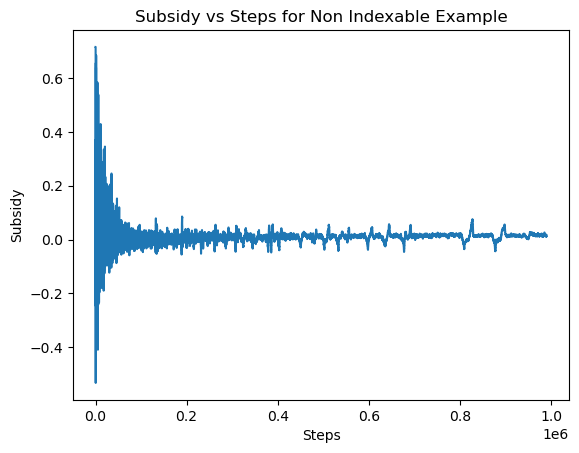

In [14]:
plt.plot(subsidies[10000:])
plt.xlabel('Steps')
plt.ylabel('Subsidy')
plt.title('Subsidy vs Steps for Non Indexable Example')

In [15]:
df=pd.DataFrame(rewards)


Text(0.5, 1.0, ' Moving Average of reward for Non Indexable Example ')

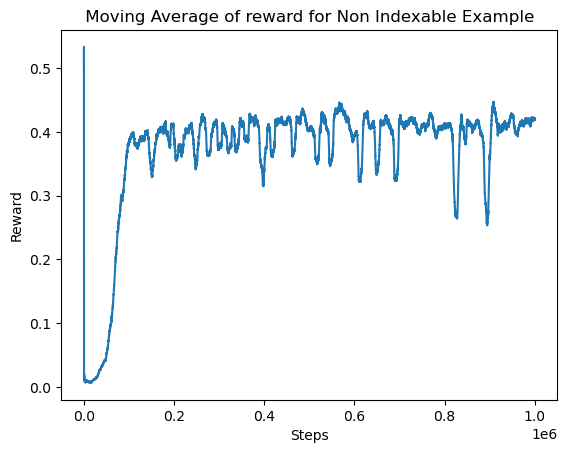

In [16]:
plt.plot(df[0].rolling(10000,min_periods=1).mean())
# plt.axhline(y = 14, color = 'r', linestyle = '-') 
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title(' Moving Average of reward for Non Indexable Example ')


Text(0.5, 1.0, ' Moving Average of number of arms activated for Non Indexable Example ')

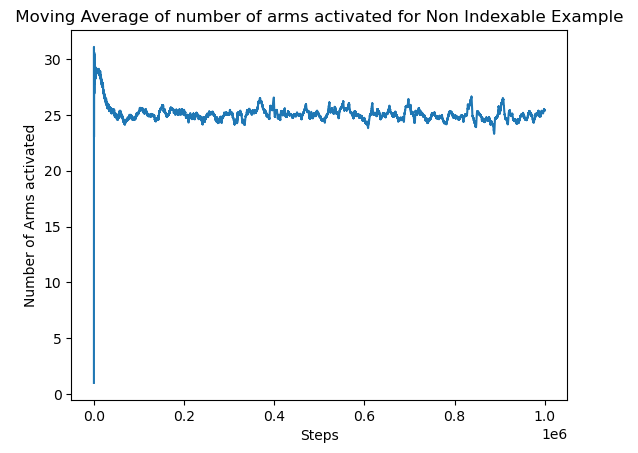

In [17]:
df['action_sums']=action_sums
plt.plot(df['action_sums'].rolling(10000,min_periods=1).mean())
plt.xlabel('Steps')
plt.ylabel('Number of Arms activated')
plt.title(' Moving Average of number of arms activated for Non Indexable Example ')


In [18]:
len(Q_values)

50

In [19]:
Q_values[20][0]

[-0.5608134407852252, -0.5490445949342116]

In [20]:
LP_indices=[0 for _ in range(8)]
for i in range(50):
    for j,x in enumerate(Q_values[i]):
        LP_indices[j]=LP_indices[j]+x[1]-x[0]



In [21]:
LP_indices

[0.7011480089082587,
 10.089433700297244,
 5.324187050573597,
 5.461749890659229,
 -6.096649096314711,
 -2.2108032085360847,
 -1.7425475763865947,
 -2.052473624296732]

In [22]:
LP_indices_final=[x/50 for x in LP_indices]
LP_indices_final

[0.014022960178165173,
 0.20178867400594488,
 0.10648374101147194,
 0.10923499781318459,
 -0.12193298192629422,
 -0.04421606417072169,
 -0.0348509515277319,
 -0.04104947248593464]

In [23]:
for x in Q_values[30]:
    print(x[1]-x[0])

0.00947750401686176
0.19429073407979214
0.10222601226292599
0.09091229615648627
-0.09855402773832123
-0.03231242747365365
-0.056237451097679636
-0.07999297048909981


In [24]:
#using learnt indices
# current_state=[random.choice([0,1,2,3,4,5,6,7]) for _ in range(N)]
current_state=[1 for _ in range(int(N/3))]
current_state.extend([2 for _ in range(int(2*N/3)+1)])
reward_sums_alt_index=[]
indices_to_pull_temp=[]
indices_to_pull=[]
alternative_indexes=[0 for _ in range(N)]
arms_pulled=[]
for i in range(1,100001):
  indices_to_pull_temp=[]
  indices_to_pull=[]
  reward_sum_alt_index=0
  reward_sum_whittle_index=0
  for index in arm_indexes:
    
    # alternative_indexes[index]=Q_values[index][current_state[index]][1]
    
    alternative_indexes[index]=Q_values[index][current_state[index]][1]-Q_values[index][current_state[index]][0]

  # print(alternative_indexes)
  indices_to_pull_temp = sorted(range(len(alternative_indexes)), key = lambda j: alternative_indexes[j])[-M:]
  # for x in indices_to_pull_temp:
  #   if alternative_indexes[x]>0:
  #     indices_to_pull.append(x)
  indices_to_pull=indices_to_pull_temp
  arms_pulled.append(len(indices_to_pull))
  # print(len(indices_to_pull))
  # temp=[]
  # temp2=[]
  # for x in indices_to_pull:
  #   temp.append(current_state[x])
  #   temp2.append(alternative_indexes[x])
  # print(temp)
  # print(temp2)
  for index in arm_indexes:
    if index in indices_to_pull:
      x=step(current_state[index],state_space,1,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_alt_index+=reward
    else:
      x=step(current_state[index],state_space,0,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_alt_index+=reward
  reward_sums_alt_index.append(reward_sum_alt_index)

In [25]:
# #using learnt indices
# arms_pulled=[]
# current_state=[random.choice([0,1,2,3,4,5,6,7]) for _ in range(N)]
# indices_to_pull=[]
# reward_sums_alt_index=[]
# alternative_indexes=[0 for _ in range(N)]
# for i in range(1,50001):
#   indices_to_pull_all=[]
#   reward_sum_alt_index=0
#   reward_sum_whittle_index=0
#   for index in arm_indexes:
#     if np.argmax(Q_values[index][current_state[index]])==1:
#       # arms_wanting_to_pulled.append([index,Q_values[index][current_state[index]][1]])
#       indices_to_pull_all.append(index)

#     # alternative_indexes[index]=Q_values[index][current_state[index]][1]
#     # alternative_indexes[index]=Q_values[index][current_state[index]][1]-Q_values[index][current_state[index]][0]
# #   print(alternative_indexes)
#   # sorted_list=sorted(arms_wanting_to_pulled,key=lambda x:x[1],reverse=True)
#   # indices_to_pull=[x[0] for x in sorted_list[:M]]  
#   # indices_to_pull = sorted(range(len(alternative_indexes)), key = lambda j: alternative_indexes[j])[-M:]
# #   print(indices_to_pull)
# #   print(current_state)
#   # print(len(indices_to_pull_all))
#   indices_to_pull=indices_to_pull_all[:M]
#   arms_pulled.append(len(indices_to_pull))
#   # print(indices_to_pull)
#   for index in arm_indexes:
#     if index in indices_to_pull:
#       x=step(current_state[index],state_space,1,P_0_matrix,P_1_matrix,reward_matrix)
#       new_state=x[0]
#       reward=x[1]
#       current_state[index]=new_state
#       reward_sum_alt_index+=reward
#     else:
#       x=step(current_state[index],state_space,0,P_0_matrix,P_1_matrix,reward_matrix)
#       new_state=x[0]
#       reward=x[1]
#       current_state[index]=new_state
#       reward_sum_alt_index+=reward
#   reward_sums_alt_index.append(reward_sum_alt_index)

Text(0.5, 1.0, ' Moving Average of reward for Non Whittle Indexable Example ')

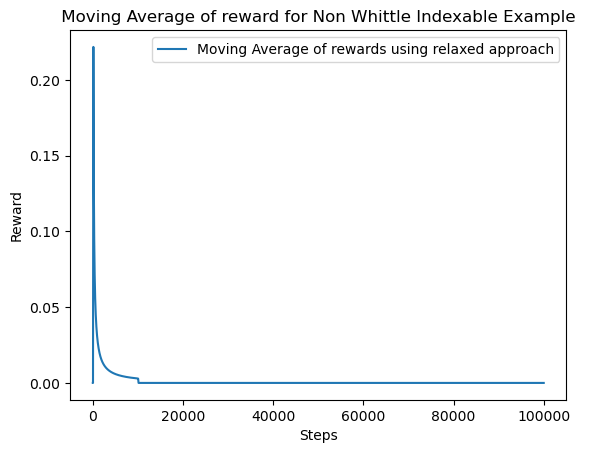

In [26]:
df_new=pd.DataFrame()

# df_new['reward_whittle']=reward_sums_whittle_index

df_new['reward_alternate']=reward_sums_alt_index

# plt.plot(df_new['original'][:50000].rolling(10000,min_periods=1).mean(),label='Moving Average of rewards using original approach')
plt.plot(df_new['reward_alternate'].rolling(10000,min_periods=1).mean(),label='Moving Average of rewards using relaxed approach')
# plt.plot(df_new['reward_alternate'])
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.title(' Moving Average of reward for Non Whittle Indexable Example ')

In [27]:
df_new['original']=reward_sums_alt_index

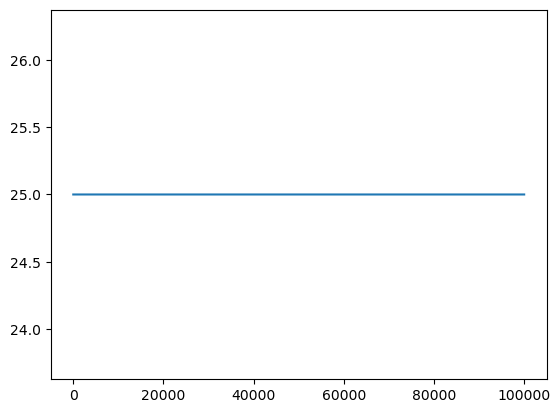

In [28]:
plt.plot(arms_pulled)

Text(0.5, 1.0, 'Moving average of Number of arms pulled')

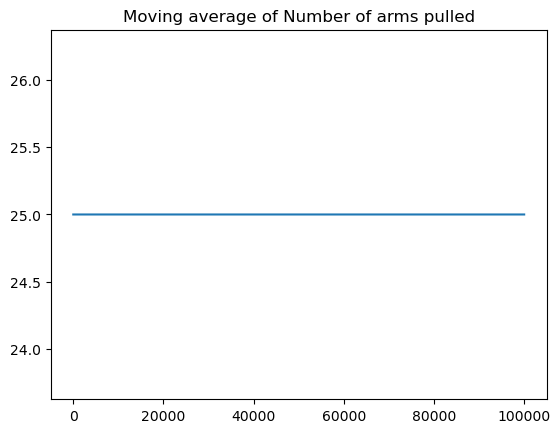

In [29]:
df_temp=pd.DataFrame()
df_temp['x']=arms_pulled
plt.plot(df_temp['x'].rolling(10000,min_periods=1).mean())
plt.title('Moving average of Number of arms pulled')
